# Chocolate Scraping with Beautiful Soup

**This is my code answers to the project from Codecedemy's Web Scraping course:**

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has over 1700 reviews of chocolate bars from all around the world. It's linked below the text for the first task.

The data is displayed in a table on a webpage, instead of in a `csv` or `json`. Using the power of BeautifulSoup that will help transform this webpage into a DataFrame in order to manipulate and analyze.


Some questions to answer about this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?


## Table of Contents
- [Metadata](#metadata)
    - [Libraries](#import-libraries)
- [Importing data with BeautifulSoup](#chocolate-scraping-with-beautiful-soup)
    - [Build out dataframe](#build-out-dataframe)
    - [Data clean up](#data-cleanup)
- [Exploratory Data Analysis](#exploratory-data-analysis)

## Metadata

[Back to top](#table-of-contents)

### Import libraries

In [67]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Exploring the webpage displayed in the browser. What elements could be useful to scrape here? Which elements do we _not_ want to scrape?


This webpage contains a table listing out chocolate ratings and information. The header, content and the image that appears above the table will be ignored:

https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

I inspected the webpage using the Web Developer Tools option in my Firefox browser. It is important to inspect the website well in order to limit the number of requests on the website. 

#### Data model build out

**List of Tags to Include:**

table id: `#cacaoTable`
- `tbody`
- `tr`: contains the data for an individual rating, so will have the loop through its `td` children
- `td`: the first set of td`s contains the column row titles as classes, all the others that follow are the data: 
    - `Company`
    - `Origin`
    - `REF`
    - `ReviewDate`
    - `CocoaPercent` 
    - `CompanyLocation`
    - `Rating`
    - `BeanType`
    - `BroadBeanOrigin`

The `rating` scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

2. Make a request from this site to get the raw HTML, in order to turn it into a BeautifulSoup object.

   The URL is

```
https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
```
   
   Pass this into the `.get()` method of the `requests` module to get the HTML.

In [68]:
webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
print(webpage.text)

<!DOCTYPE html>
<html lang="en">
   <head>
      <meta charset="utf-8">
      <style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
   </head>
   <body>
      <!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
      <div id="banner">
         <h1>Cacao Ratings</h1>
      </div>
      <div id="infoContainer">
         <table class="infoTable">
            <tr>
               <td>Compiled ratings of over 1700 Chocolate bars</td>
            </tr>
            <tr>
               <td>Ratings are from 1-5</td>
            </tr>
         </tabl

3. Create a BeautifulSoup object called `soup` to traverse this HTML.

   Use `"html.parser"` as the parser, and the content of the response you got from your request as the document.

In [69]:
soup = BeautifulSoup(webpage.content, "html.parser")

4. If you want, print out the `soup` object to explore the HTML.

   So many table rows! You're probably very relieved that we don't have to scrape this information by hand.

In [70]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

Look at the table rows for `cacaoTable` class:

In [71]:
cocao_table = soup.select("#cacaoTable")
print(cocao_table)

[<table id="cacaoTable">
<tr>
<td class="Company">Company 
               (Maker-if known)
            </td>
<td class="Origin">Specific Bean Origin
               or Bar Name
            </td>
<td class="REF">REF</td>
<td class="ReviewDate">Review
               Date
            </td>
<td class="CocoaPercent">Cocoa
               Percent
            </td>
<td class="CompanyLocation">Company
               Location
            </td>
<td class="Rating">Rating</td>
<td class="BeanType">Bean
               Type
            </td>
<td class="BroadBeanOrigin">Broad Bean
               Origin
            </td>
</tr>
<tr>
<td class="Company">A. Morin</td>
<td class="Origin">Agua Grande</td>
<td class="REF">1876</td>
<td class="ReviewDate">2016</td>
<td class="CocoaPercent">63%</td>
<td class="CompanyLocation">France</td>
<td class="Rating">3.75</td>
<td class="BeanType"> </td>
<td class="BroadBeanOrigin">Sao Tome</td>
</tr>
<tr>
<td class="Company">A. Morin</td>
<td class="Origin">Kpime</td>
<

Pull out the class names for the data rows, that will become the column row names in the dataframe:

In [72]:
test_soup = cocao_table[0].find("tr")

# print(test_soup)
column_list = []

for data_i in test_soup.select("td"):
    column_list.append(data_i.attrs['class'][0])
    
print(column_list)

['Company', 'Origin', 'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating', 'BeanType', 'BroadBeanOrigin']


Extract the values for each row into a list (datatype: list(list[Any])), using list comprehension so that it doesn't take up too much memory to process:

In [73]:
def extract_td_values(table):
    for row in table.find_all('tr'):
        yield [td.get_text(strip=True) for td in row.find_all('td')]

table_data = [row_values for row_values in extract_td_values(cocao_table[0])] # list comprehension

# print out to see if format is correct
for item in table_data:
    print(f'{item}\n')


['Company\xa0\n               (Maker-if known)', 'Specific Bean Origin\n               or Bar Name', 'REF', 'Review\n               Date', 'Cocoa\n               Percent', 'Company\n               Location', 'Rating', 'Bean\n               Type', 'Broad Bean\n               Origin']

['A. Morin', 'Agua Grande', '1876', '2016', '63%', 'France', '3.75', '', 'Sao Tome']

['A. Morin', 'Kpime', '1676', '2015', '70%', 'France', '2.75', '', 'Togo']

['A. Morin', 'Atsane', '1676', '2015', '70%', 'France', '3', '', 'Togo']

['A. Morin', 'Akata', '1680', '2015', '70%', 'France', '3.5', '', 'Togo']

['A. Morin', 'Quilla', '1704', '2015', '70%', 'France', '3.5', '', 'Peru']

['A. Morin', 'Carenero', '1315', '2014', '70%', 'France', '2.75', 'Criollo', 'Venezuela']

['A. Morin', 'Cuba', '1315', '2014', '70%', 'France', '3.5', '', 'Cuba']

['A. Morin', 'Sur del Lago', '1315', '2014', '70%', 'France', '3.5', 'Criollo', 'Venezuela']

['A. Morin', 'Puerto Cabello', '1319', '2014', '70%', 'France', '3.75

Remove the first record, as I will use the `column_list` that will be used for the column names. 

In [74]:
# Remove the first record from table_data
table_data.pop(0)

['Company\xa0\n               (Maker-if known)',
 'Specific Bean Origin\n               or Bar Name',
 'REF',
 'Review\n               Date',
 'Cocoa\n               Percent',
 'Company\n               Location',
 'Rating',
 'Bean\n               Type',
 'Broad Bean\n               Origin']

## Build out dataframe

[Back to top](#table-of-contents)

Pass in lists of list, `table_data`.

In [75]:
chocolate_df = pd.DataFrame(table_data, columns=column_list)

#### EDA of new dataframe 

In [76]:
chocolate_df.head()

,Company,Origin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru


In [77]:
chocolate_df.tail()

,Company,Origin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.5,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3,,Brazil


In [78]:
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          1795 non-null   object
 1   Origin           1795 non-null   object
 2   REF              1795 non-null   object
 3   ReviewDate       1795 non-null   object
 4   CocoaPercent     1795 non-null   object
 5   CompanyLocation  1795 non-null   object
 6   Rating           1795 non-null   object
 7   BeanType         1795 non-null   object
 8   BroadBeanOrigin  1795 non-null   object
dtypes: object(9)
memory usage: 126.3+ KB


In [79]:
chocolate_df.describe()

,Company,Origin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
count,1795,1795,1795,1795,1795,1795,1795,1795,1795
unique,416,1039,440,12,45,60,13,41,100
top,Soma,Madagascar,414,2015,70%,U.S.A.,3.5,,Venezuela
freq,47,57,10,285,672,764,392,888,214


#### Data Cleanup

[Back to top](#table-of-contents)

Remove % sign from CocaoPercent values. Change all data types so that `.describe()` outputs correctly and I can do analysis. 

In [80]:
chocolate_df['CocoaPercent'] = chocolate_df['CocoaPercent'].str.rstrip('%').astype(float)

Check to see if `CocoaPercent` edit was successful.

In [81]:
chocolate_df.head()

,Company,Origin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.5,,Peru


Update all data types: 

In [82]:
# Convert the data types of all columns in the dataframe
chocolate_df = chocolate_df.astype({
    'Company': 'string',
    'Origin': 'string',
    'REF': 'int16',
    'ReviewDate': 'int16',
    'CompanyLocation': 'string',
    'Rating': 'float',
    'BeanType': 'string',
    'BroadBeanOrigin': 'string'
})

# Convert ReviewDate datatype to datetime of year
chocolate_df['ReviewDate'] = pd.to_datetime(chocolate_df['ReviewDate'], format='%Y')

# Verify the changes
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Company          1795 non-null   string        
 1   Origin           1795 non-null   string        
 2   REF              1795 non-null   int16         
 3   ReviewDate       1795 non-null   datetime64[ns]
 4   CocoaPercent     1795 non-null   float64       
 5   CompanyLocation  1795 non-null   string        
 6   Rating           1795 non-null   float64       
 7   BeanType         1795 non-null   string        
 8   BroadBeanOrigin  1795 non-null   string        
dtypes: datetime64[ns](1), float64(2), int16(1), string(5)
memory usage: 115.8 KB


In [83]:
chocolate_df.head()

,Company,Origin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016-01-01,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015-01-01,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015-01-01,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015-01-01,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015-01-01,70.0,France,3.50,,Peru


In [84]:
chocolate_df.describe()

,REF,ReviewDate,CocoaPercent,Rating
count,1795.000000,1795,1795.000000,1795.000000
mean,1035.904735,2012-04-29 03:57:27.576601600,71.698329,3.185933
min,5.000000,2006-01-01 00:00:00,42.000000,1.000000
25%,576.000000,2010-01-01 00:00:00,70.000000,2.875000
50%,1069.000000,2013-01-01 00:00:00,70.000000,3.250000
75%,1502.000000,2015-01-01 00:00:00,75.000000,3.500000
max,1952.000000,2017-01-01 00:00:00,100.000000,5.000000
std,552.886365,NaN,6.323118,0.478062


**Check for duplicates** 

There are no duplicates in this dataset. 

In [85]:
chocolate_df.duplicated().sum()

0

## Exploratory Data Analysis

[Back to top](#table-of-contents)

### How are ratings distributed?

How many terrible chocolate bars are out there? And how many earned a perfect 5? 

Using Matplotlib, create a histogram of the ratings values:

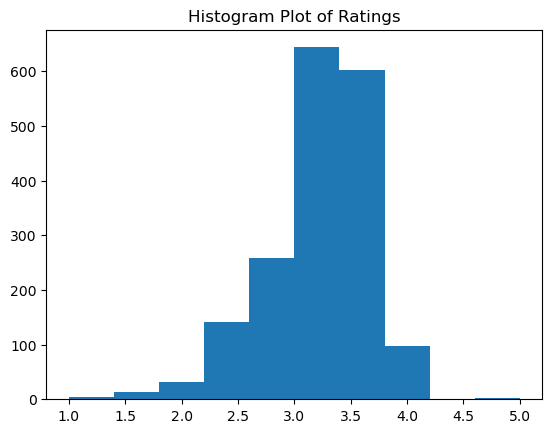

In [86]:
plt.hist(chocolate_df['Rating'])
plt.title('Histogram Plot of Ratings')
plt.show()

### Which chocolatier makes the best chocolate?

Find the 10 most highly rated chocolatiers. Do a `groupby` to find the ones with the highest average rating.

In [87]:
mean_ratings = chocolate_df.groupby('Company')['Rating'].mean()
ten_best = mean_ratings.nlargest(10)
print(ten_best)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


### Is more cacao better?

I want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

 Make a scatterplot of ratings (`chocolate_df.Rating`) vs percentage of cocoa (`chocolate_df.CocoaPercent`).

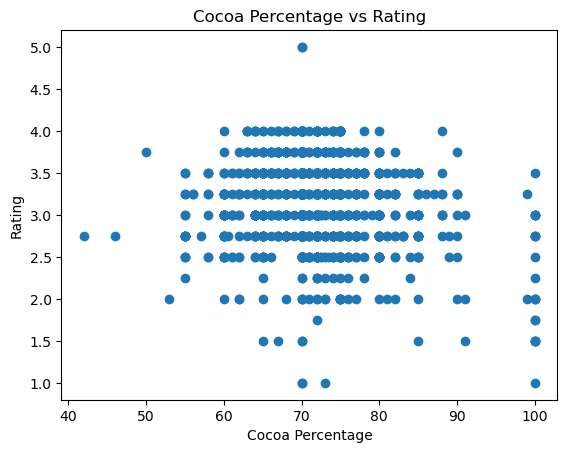

In [95]:
plt.scatter(chocolate_df['CocoaPercent'], chocolate_df['Rating'])
plt.title('Cocoa Percentage vs Rating')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.show()

In [90]:
plt.clf()

<Figure size 640x480 with 0 Axes>

Is there any correlation here? Use some numpy commands to draw a line of best-fit over the scatterplot.

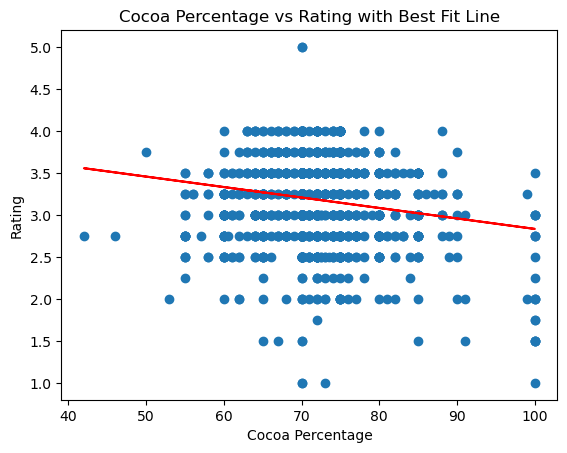

In [96]:
plt.scatter(chocolate_df['CocoaPercent'], chocolate_df['Rating'])
z = np.polyfit(chocolate_df['CocoaPercent'], chocolate_df['Rating'], 1)
line_function = np.poly1d(z)
plt.plot(chocolate_df['CocoaPercent'], line_function(chocolate_df['CocoaPercent']), "r-")
plt.title('Cocoa Percentage vs Rating with Best Fit Line')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.show()

### Where are the best cocoa beans grown?

In [93]:
# Group by BroadBeanOrigin and calculate the mean rating
bean_origin_ratings = chocolate_df.groupby('BroadBeanOrigin')['Rating'].mean()

# Sort the ratings in descending order to find the best origins
best_bean_origins = bean_origin_ratings.sort_values(ascending=False)

# Display the top 10 origins with the highest average ratings
print(best_bean_origins.head(10))

BroadBeanOrigin
Gre., PNG, Haw., Haiti, Mad     4.00
Venezuela, Java                 4.00
Guat., D.R., Peru, Mad., PNG    4.00
Ven, Bolivia, D.R.              4.00
Dom. Rep., Madagascar           4.00
Peru, Dom. Rep                  4.00
Dominican Rep., Bali            3.75
DR, Ecuador, Peru               3.75
Venez,Africa,Brasil,Peru,Mex    3.75
Ven.,Ecu.,Peru,Nic.             3.75
Name: Rating, dtype: float64


### Which countries produce the highest-rated bars?

In [94]:
# Group by CompanyLocation and calculate the mean rating
country_ratings = chocolate_df.groupby('CompanyLocation')['Rating'].mean()

# Sort the ratings in descending order to find the best countries
best_countries = country_ratings.sort_values(ascending=False)

# Display the top 10 countries with the highest average ratings
print(best_countries.head(10))

CompanyLocation
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Name: Rating, dtype: float64
